In [10]:
import pandas as pd #Pandas is used for data manipulation and analysis
import numpy as np # NumPy provides support for large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # Matplotlib is a plotting library for creating visualizations

In [11]:
diabetes_dt=pd.read_csv("/content/diabetes.csv") #Upload diabetes CSV file

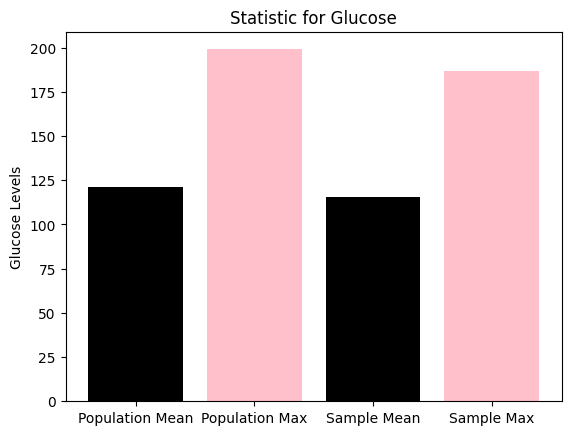

In [12]:

np.random.seed(846)


diabetes_sample = diabetes_dt.sample(25) # Sample 25 random rows from the diabetes_dt DataFrame

# Calculate the mean and max values for the 'Glucose' column in the entire population
populationmean_gl = diabetes_dt['Glucose'].mean()
populationmax_gl = diabetes_dt['Glucose'].max()

# Calculate the mean and max values for the 'Glucose' column in the sampled data
samplemean_gl = diabetes_sample['Glucose'].mean()
samplemax_gl = diabetes_sample['Glucose'].max()


# Define labels and values for the bar chart
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [populationmean_gl, populationmax_gl, samplemean_gl, samplemax_gl]

plt.bar(labels, values, color=['black', 'pink', 'black', 'pink'])
plt.title('Statistic for Glucose')
plt.ylabel('Glucose Levels')
plt.show()


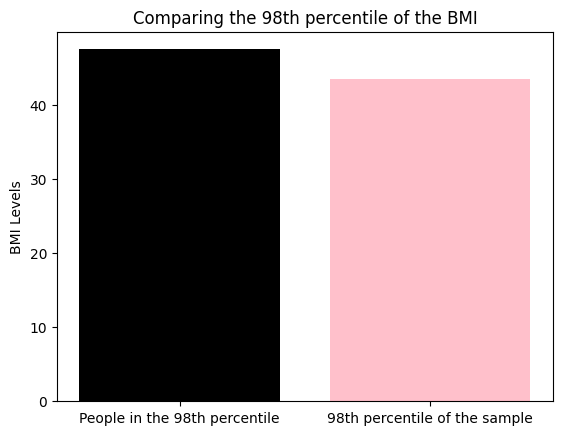

In [13]:
population_per = np.percentile(diabetes_dt['BMI'], 98) # Calculate the 98th percentile of BMI for the entire population
sample_per = np.percentile(diabetes_sample['BMI'], 98) # Calculate the 98th percentile of BMI for the sampled data

# Define labels and values for the bar chart
labels = ['People in the 98th percentile', '98th percentile of the sample']
values = [population_per, sample_per]
# Create a bar chart with specified labels, values, and colors
plt.bar(labels, values, color=['black', 'pink'])
plt.title('Comparing the 98th percentile of the BMI')
plt.ylabel('BMI Levels')
plt.show()

In [14]:
# Set the number of bootstrap samples and the size of each bootstrap sample
diabetesbootstrap_samples = 500
diabetessample_size = 150

# Initialize arrays to store bootstrap statistics
diabetesBS_mean = np.zeros(diabetesbootstrap_samples)
diabetesBS_stddeviation = np.zeros(diabetesbootstrap_samples)
diabetesBS_per = np.zeros(diabetesbootstrap_samples)


for i in range(diabetesbootstrap_samples):
    diabetesbootstrap_sample = diabetes_dt['BloodPressure'].sample(diabetessample_size, replace=True)
    diabetesBS_mean[i] = diabetesbootstrap_sample.mean()
    diabetesBS_stddeviation[i] = diabetesbootstrap_sample.std()
    diabetesBS_per[i] = np.percentile(diabetesbootstrap_sample, 98)

# Calculate population statistics for comparison
population_m = diabetes_dt['BloodPressure'].mean()
population_sd = diabetes_dt['BloodPressure'].std()
population_per = np.percentile(diabetes_dt['BloodPressure'], 98)

# Calculate the mean of bootstrap sample means, standard deviations, and percentiles
BS_mean=np.mean(diabetesBS_mean)
BS_sd=np.mean(diabetesBS_stddeviation)
BS_p=np.mean(diabetesBS_per)


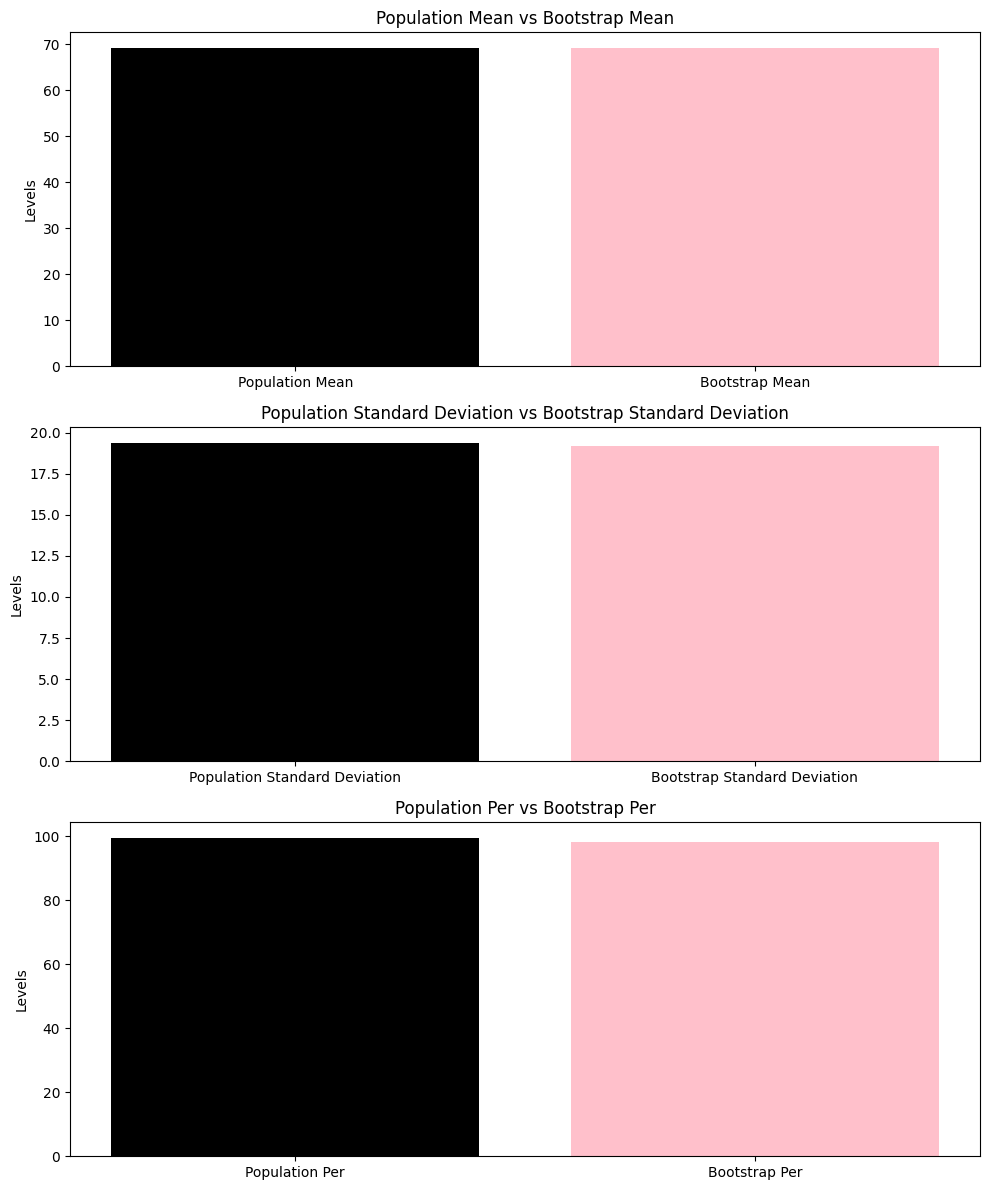

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_m, BS_mean], color=['black', 'pink'])
axs[0].set_ylabel('Levels')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Standard Deviation', 'Bootstrap Standard Deviation'], [population_sd, BS_sd], color=['black', 'pink'])
axs[1].set_ylabel('Levels')
axs[1].set_title('Population Standard Deviation vs Bootstrap Standard Deviation')


axs[2].bar(['Population Per', 'Bootstrap Per'], [population_per, BS_p], color=['black', 'pink'])
axs[2].set_ylabel('Levels')
axs[2].set_title('Population Per vs Bootstrap Per')

plt.tight_layout()
plt.show()